Customer Segementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
#Step-1: Load the dataset
import pandas as pd

data = pd.read_csv('Mall_Customers.csv')

In [7]:
# Step 2: Explore the Data
# Check the column names and first few rows to understand the data structure
print(data.columns)
print(data.head())

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


In [8]:
# Step 3: Preprocess the Data
# Encode 'Gender' as numerical values (Male = 0, Female = 1)
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Drop 'CustomerID' if present (not needed for segmentation)
# In this case, 'CustomerID' is not part of the dataset, so this step is not necessary

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())



Missing Values:
 Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [9]:
# Step 4: Feature Scaling
# Standardize the numerical features for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


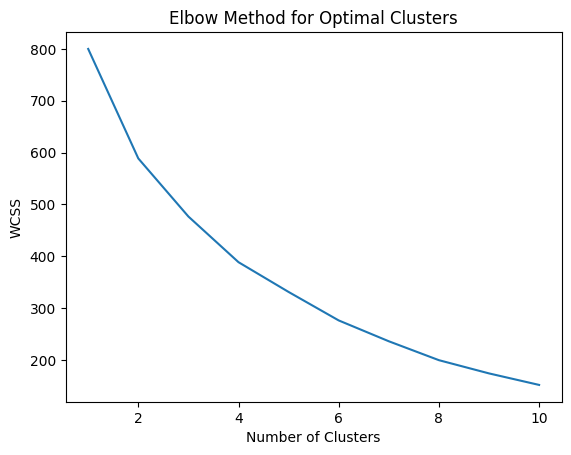

In [10]:
# Step 5: Determine the Optimal Number of Clusters (Elbow Method)
# Find the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
# Step 6: Fit K-Means to the data (Choose optimal clusters, e.g., 5 clusters)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(scaled_data)

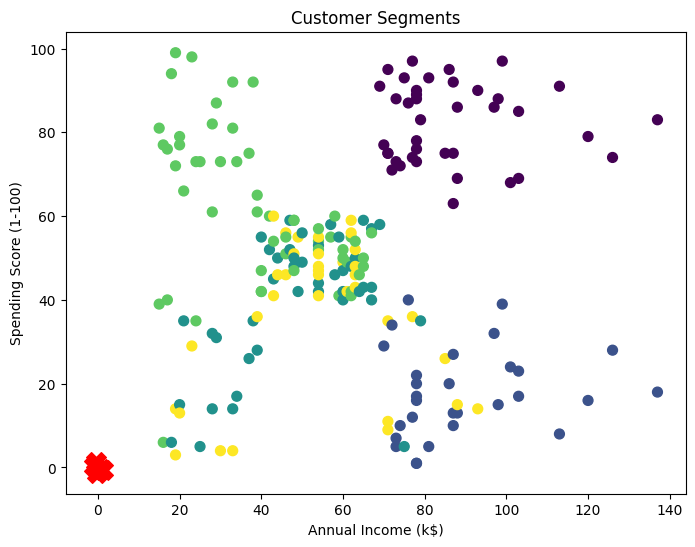

In [12]:
# Step 7: Visualize the Clusters
# Visualize the clusters with respect to 'Annual Income' and 'Spending Score'
plt.figure(figsize=(8, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=y_kmeans, s=50, cmap='viridis')

# Mark the centroids of the clusters
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 3], c='red', s=200, marker='X')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [13]:
# Step 8: Add the cluster label to the original data
data['Cluster'] = y_kmeans

# Display the data with cluster labels
print(data.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       0   19                  15                      39        3
1       0   21                  15                      81        3
2       1   20                  16                       6        3
3       1   23                  16                      77        3
4       1   31                  17                      40        3
